# 8.6. Using a random forest to select important features for regression

In [8]:
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [9]:
data = skd.load_boston()

In [10]:
reg = ske.RandomForestRegressor()

In [11]:
X = data['data']
y = data['target']

In [12]:
reg.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [13]:
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]

Text(0.5, 1.0, 'Features importance')

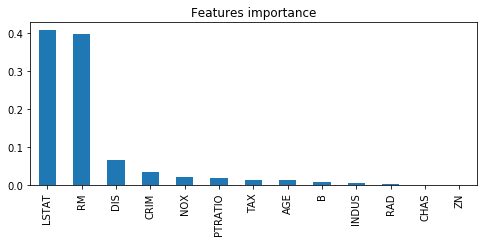

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
labels = data['feature_names'][fet_ind]
pd.Series(fet_imp, index=labels).plot('bar', ax=ax)
ax.set_title('Features importance')

Text(0, 0.5, 'Value of houses (k$)')

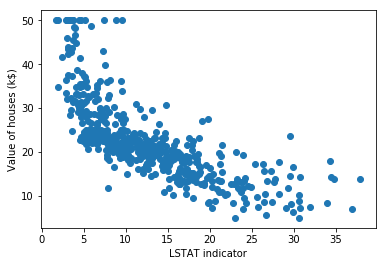

In [15]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X[:, -1], y)
ax.set_xlabel('LSTAT indicator')
ax.set_ylabel('Value of houses (k$)')

In [9]:
from sklearn import tree
#tree.export_graphviz(reg.estimators_[0],
#                     'tree.dot')